# Preparing Taxi Dataset for Analysis & Prediction Fare Amount

### Loading Taxi Dataset

In [340]:
import pandas as pd
trip_df = pd.read_csv('/Users/kenny_jung/aiffel/data/trip.csv')
trip_df.head()

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
0,Pamela Duffy,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,Debit Card,6,3.34,13.0,2.76,0.0
1,Michelle Foster,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,Debit Card,1,1.80,16.0,4.00,0.0
2,Tina Combs,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,Debit Card,1,1.00,6.5,1.45,0.0
3,Anthony Ray,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,Cash,1,3.70,20.5,6.39,0.0
4,Brianna Johnson,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,Debit Card,1,4.37,16.5,0.00,0.0


In [341]:
trip_df.describe()

,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
count,22701.000000,22701.000000,22698.000000,22701.000000,22701.000000
mean,1.643584,2.913400,13.024009,1.835745,0.312514
std,1.304942,3.653023,13.240074,2.800537,1.399153
min,0.000000,0.000000,-120.000000,0.000000,0.000000
25%,1.000000,0.990000,6.500000,0.000000,0.000000
50%,1.000000,1.610000,9.500000,1.350000,0.000000
75%,2.000000,3.060000,14.500000,2.450000,0.000000
max,36.000000,33.960000,999.990000,200.000000,19.100000


In [342]:
trip_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22701 entries, 0 to 22700
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   passenger_name         22701 non-null  object 
 1   tpep_pickup_datetime   22701 non-null  object 
 2   tpep_dropoff_datetime  22701 non-null  object 
 3   payment_method         22701 non-null  object 
 4   passenger_count        22701 non-null  int64  
 5   trip_distance          22701 non-null  float64
 6   fare_amount            22698 non-null  float64
 7   tip_amount             22701 non-null  float64
 8   tolls_amount           22701 non-null  float64
dtypes: float64(4), int64(1), object(4)
memory usage: 1.6+ MB


## Handling missing data 

In [343]:
# Count missing data > missing three(3) record in column 'fare_amount' 
trip_df.isnull().sum()

passenger_name           0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
payment_method           0
passenger_count          0
trip_distance            0
fare_amount              3
tip_amount               0
tolls_amount             0
dtype: int64

In [344]:
# Calculate ratio of missing data > 0.132% missing data in column 'fare_amount'
trip_df.isnull().mean()

passenger_name           0.000000
tpep_pickup_datetime     0.000000
tpep_dropoff_datetime    0.000000
payment_method           0.000000
passenger_count          0.000000
trip_distance            0.000000
fare_amount              0.000132
tip_amount               0.000000
tolls_amount             0.000000
dtype: float64

In [345]:
# Replace missing 'fare_amount' with median value
trip_df['fare_amount'].fillna(trip_df['fare_amount'].median(), inplace=True)

In [346]:
# Confirm missing data is replaced in the column 'fare_amount'
trip_df.isnull().mean()

passenger_name           0.0
tpep_pickup_datetime     0.0
tpep_dropoff_datetime    0.0
payment_method           0.0
passenger_count          0.0
trip_distance            0.0
fare_amount              0.0
tip_amount               0.0
tolls_amount             0.0
dtype: float64

# Handling duplicated data

In [347]:
trip_df[trip_df.duplicated()]

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
17,Sarah Gross,08/15/2017 7:48:08 PM,08/15/2017 8:00:37 PM,Cash,1,3.6,12.5,2.85,0.0
204,Lisa Bullock,02/13/2017 4:25:41 PM,02/13/2017 4:55:35 PM,Cash,1,4.2,21.0,0.00,0.0


In [348]:
trip_df = trip_df.drop_duplicates()

## Handling outliers

In [349]:
# Import libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns

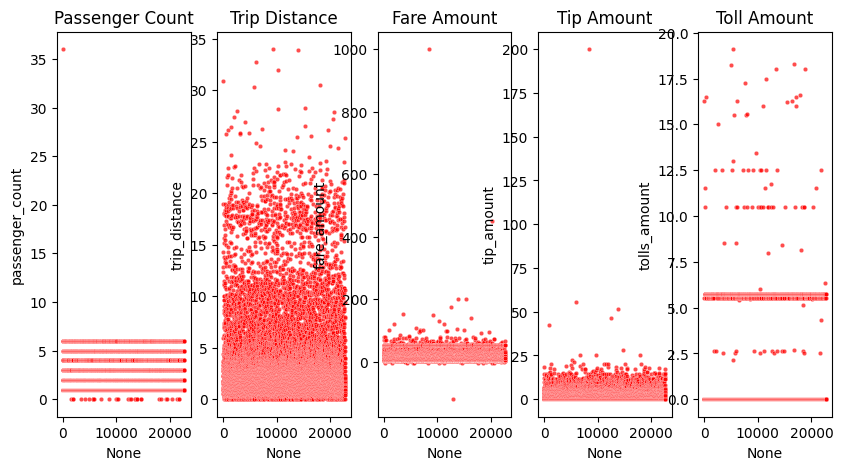

In [350]:
# Visualize the distribution of 'Passenger Count', 'Trip Distance', 'Fare Amount', 'Tip Amount', 'Toll Amount' for understanding outliers
f, ax = plt.subplots(1, 5, figsize=(10, 5))

sns.scatterplot(x =trip_df.index , y = trip_df['passenger_count'], ax=ax[0], s=10, alpha=0.7, color='red')
ax[0].set_title('Passenger Count')

sns.scatterplot(x =trip_df.index , y = trip_df['trip_distance'], ax=ax[1], s=10, alpha=0.7, color='red')
ax[1].set_title('Trip Distance')

sns.scatterplot(x =trip_df.index , y = trip_df['fare_amount'], ax=ax[2], s=10, alpha=0.7, color='red')
ax[2].set_title('Fare Amount')

sns.scatterplot(x =trip_df.index , y = trip_df['tip_amount'], ax=ax[3], s=10, alpha=0.7, color='red')
ax[3].set_title('Tip Amount')

sns.scatterplot(x =trip_df.index , y = trip_df['tolls_amount'], ax=ax[4], s=10, alpha=0.7, color='red')
ax[4].set_title('Toll Amount')

plt.subplots_adjust(wspace=0.2, hspace=0.2)
plt.show()

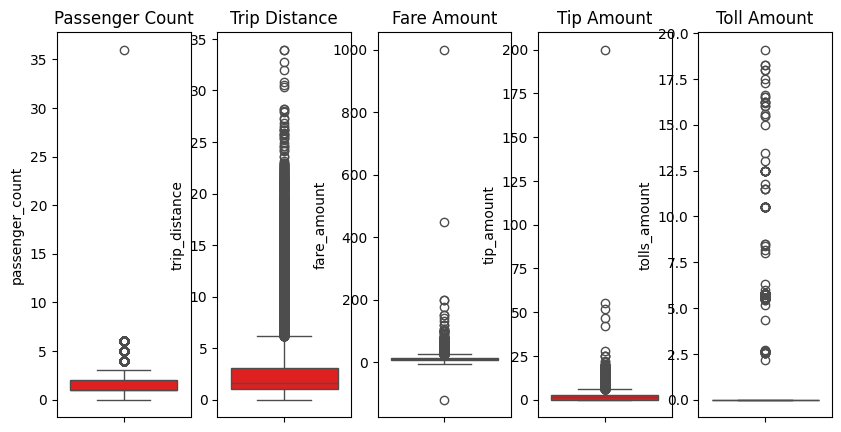

In [351]:
# Visualize the distribution of 'Passenger Count', 'Trip Distance', 'Fare Amount', 'Tip Amount', 'Toll Amount' for understanding outliers
f, ax = plt.subplots(1, 5, figsize=(10, 5))

sns.boxplot(trip_df['passenger_count'], ax=ax[0], color="red")
ax[0].set_title('Passenger Count')

sns.boxplot( trip_df['trip_distance'], ax=ax[1], color="red")
ax[1].set_title('Trip Distance')

sns.boxplot(trip_df['fare_amount'], ax=ax[2], color="red")
ax[2].set_title('Fare Amount')

sns.boxplot(trip_df['tip_amount'], ax=ax[3], color="red")
ax[3].set_title('Tip Amount')

sns.boxplot(trip_df['tolls_amount'], ax=ax[4], color="red")
ax[4].set_title('Toll Amount')

plt.subplots_adjust(wspace=0.2, hspace=0.2)
plt.show()

In [352]:
# drop data in 'passenger_count' > 10, 'fare_amount' > 400 or < 0, 'tip_amount' > 100
trip_df = trip_df[trip_df['passenger_count'] <= 10]
trip_df = trip_df[trip_df['fare_amount'] <= 400]
trip_df = trip_df[trip_df['fare_amount'] >= 0]
trip_df = trip_df[trip_df['tip_amount'] <= 100]


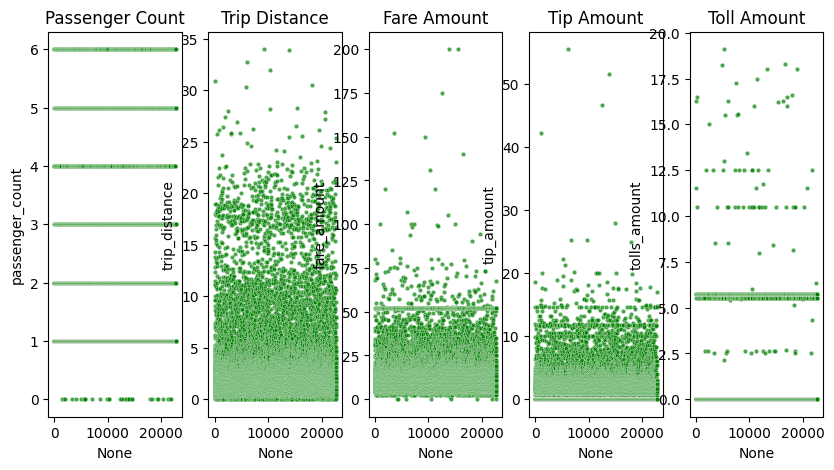

In [353]:
# Visualize the distribution of 'Passenger Count', 'Trip Distance', 'Fare Amount', 'Tip Amount', 'Toll Amount' after removing outliers
f, ax = plt.subplots(1, 5, figsize=(10, 5))

sns.scatterplot(x =trip_df.index , y = trip_df['passenger_count'], ax=ax[0], s=10, alpha=0.7, color='green')
ax[0].set_title('Passenger Count')

sns.scatterplot(x =trip_df.index , y = trip_df['trip_distance'], ax=ax[1], s=10, alpha=0.7, color='green')
ax[1].set_title('Trip Distance')

sns.scatterplot(x =trip_df.index , y = trip_df['fare_amount'], ax=ax[2], s=10, alpha=0.7, color='green')
ax[2].set_title('Fare Amount')

sns.scatterplot(x =trip_df.index , y = trip_df['tip_amount'], ax=ax[3], s=10, alpha=0.7, color='green')
ax[3].set_title('Tip Amount')

sns.scatterplot(x =trip_df.index , y = trip_df['tolls_amount'], ax=ax[4], s=10, alpha=0.7, color='green')
ax[4].set_title('Toll Amount')

plt.subplots_adjust(wspace=0.2, hspace=0.2)
plt.show()

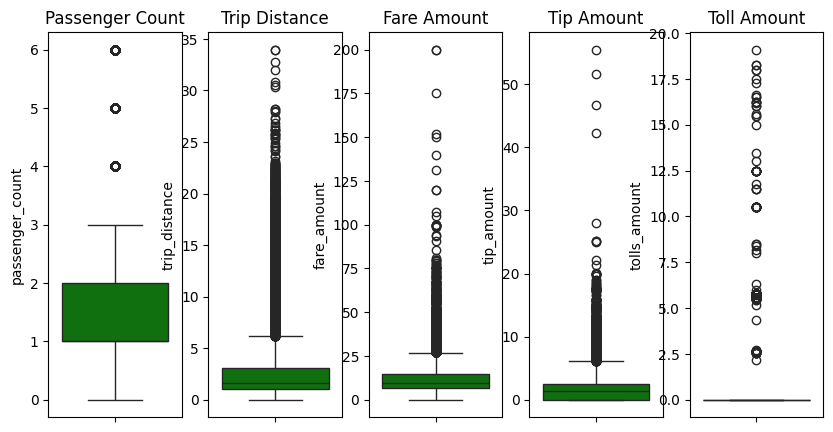

In [354]:
# Visualize the distribution of 'Passenger Count', 'Trip Distance', 'Fare Amount', 'Tip Amount', 'Toll Amount' after removing outliers
f, ax = plt.subplots(1, 5, figsize=(10, 5))

sns.boxplot(trip_df['passenger_count'], ax=ax[0], color="green")
ax[0].set_title('Passenger Count')

sns.boxplot( trip_df['trip_distance'], ax=ax[1], color="green")
ax[1].set_title('Trip Distance')

sns.boxplot(trip_df['fare_amount'], ax=ax[2], color="green")
ax[2].set_title('Fare Amount')

sns.boxplot(trip_df['tip_amount'], ax=ax[3], color="green")
ax[3].set_title('Tip Amount')

sns.boxplot(trip_df['tolls_amount'], ax=ax[4], color="green")
ax[4].set_title('Toll Amount')

plt.subplots_adjust(wspace=0.2, hspace=0.2)
plt.show()

### Additional feature engineering

In [355]:
# Transform 'tpep_pickup_datetime' & 'tpep_dropoff_datetime' data type to datetime 
trip_df['tpep_pickup_datetime'] = pd.to_datetime(trip_df['tpep_pickup_datetime'])
trip_df['tpep_dropoff_datetime'] = pd.to_datetime(trip_df['tpep_dropoff_datetime'])

# Calculate 'trip_duration' & 'trip_duration_hours' from 'tpep_pickup_datetime' & 'tpep_dropoff_datetime'
trip_df['trip_duration'] = trip_df['tpep_dropoff_datetime'] - trip_df['tpep_pickup_datetime']
trip_df['trip_duration_hours'] = trip_df['trip_duration'].dt.total_seconds() / 3600

trip_df.head()

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount,trip_duration,trip_duration_hours
0,Pamela Duffy,2017-03-25 08:55:43,2017-03-25 09:09:47,Debit Card,6,3.34,13.0,2.76,0.0,0 days 00:14:04,0.234444
1,Michelle Foster,2017-04-11 14:53:28,2017-04-11 15:19:58,Debit Card,1,1.80,16.0,4.00,0.0,0 days 00:26:30,0.441667
2,Tina Combs,2017-12-15 07:26:56,2017-12-15 07:34:08,Debit Card,1,1.00,6.5,1.45,0.0,0 days 00:07:12,0.120000
3,Anthony Ray,2017-05-07 13:17:59,2017-05-07 13:48:14,Cash,1,3.70,20.5,6.39,0.0,0 days 00:30:15,0.504167
4,Brianna Johnson,2017-04-15 23:32:20,2017-04-15 23:49:03,Debit Card,1,4.37,16.5,0.00,0.0,0 days 00:16:43,0.278611


In [356]:
# Understand 'payment_method' unique values
trip_df['payment_method'].unique()


array(['Debit Card', 'Cash', 'Credit Card'], dtype=object)

In [357]:
# Replace 'payment_method' with numeric values
trip_df['payment_method'] = trip_df['payment_method'].replace({'Debit Card': 1, 'Cash': 2, 'Credit Card': 3})
trip_df.head()

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount,trip_duration,trip_duration_hours
0,Pamela Duffy,2017-03-25 08:55:43,2017-03-25 09:09:47,1,6,3.34,13.0,2.76,0.0,0 days 00:14:04,0.234444
1,Michelle Foster,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1,1.80,16.0,4.00,0.0,0 days 00:26:30,0.441667
2,Tina Combs,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1,1.00,6.5,1.45,0.0,0 days 00:07:12,0.120000
3,Anthony Ray,2017-05-07 13:17:59,2017-05-07 13:48:14,2,1,3.70,20.5,6.39,0.0,0 days 00:30:15,0.504167
4,Brianna Johnson,2017-04-15 23:32:20,2017-04-15 23:49:03,1,1,4.37,16.5,0.00,0.0,0 days 00:16:43,0.278611


In [358]:
# Create new dataframe with selected columns
trip_dfm = trip_df[['payment_method', 'passenger_count', 'trip_distance', 'fare_amount', 'tip_amount', 'tolls_amount', 'trip_duration_hours']]
trip_dfm.head()

,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount,trip_duration_hours
0,1,6,3.34,13.0,2.76,0.0,0.234444
1,1,1,1.80,16.0,4.00,0.0,0.441667
2,1,1,1.00,6.5,1.45,0.0,0.120000
3,2,1,3.70,20.5,6.39,0.0,0.504167
4,1,1,4.37,16.5,0.00,0.0,0.278611


<Axes: title={'center': 'Pearson Correlation of Features'}>

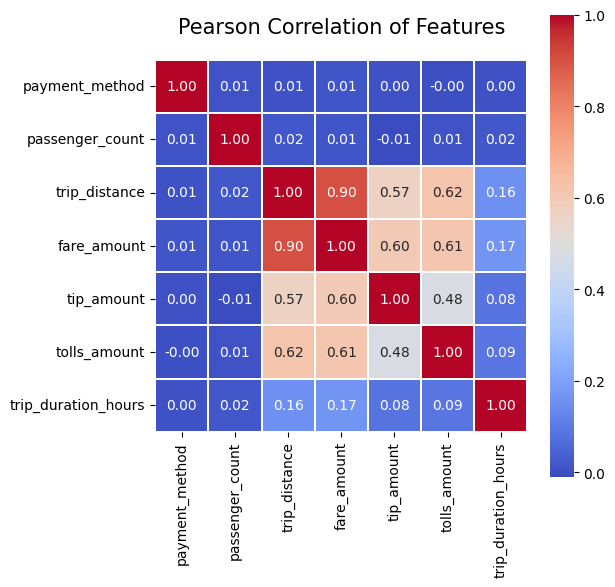

In [359]:
# Understand correlation between features
colormap = plt.cm.coolwarm
plt.figure(figsize=(6, 6))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(trip_dfm.astype(float).corr(), linewidths=0.1, vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True, annot_kws={'size': 10}, fmt='.2f')

## Predict fare amount with Liner Regression Model

In [360]:
# Import libraries for machine learning
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

In [361]:
# Split data into train and test set
X_train = trip_dfm.drop('fare_amount', axis=1).values
target_label = trip_dfm['fare_amount'].values

In [362]:
# Split data into train and test set
X_train, X_validation, y_train, y_validation = train_test_split(X_train, target_label, test_size=0.3, random_state=2024)

In [363]:
# Train model (Linear Regression)
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [364]:
# Predict 'fare_amount' using test set and calculate MSE & R²
y_pred = model.predict(X_validation)
mse = mean_squared_error(y_validation, y_pred)
r_squared = model.score(X_validation, y_validation)
print(f"Mean Squared Error: {mse}")
print(f"R² Value: {r_squared}")

Mean Squared Error: 24.812919291388454
R² Value: 0.802559256117606


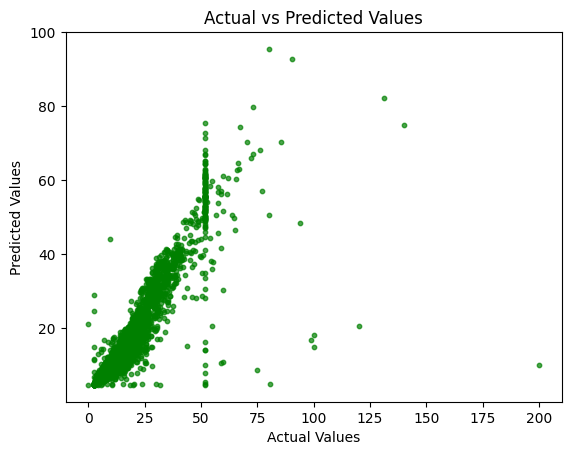

In [365]:
# Visualize the actual vs predicted fare amount
import matplotlib.pyplot as plt

plt.scatter(y_validation, y_pred,  s=10, alpha=0.7, color='green')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()

## Predict fare amount with Random Forest Regression Model

In [366]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [367]:
# Split data into train and test set
X_train = trip_dfm.drop('fare_amount', axis=1).values
target_label = trip_dfm['fare_amount'].values

In [368]:
# Split data into train and test set
X_train, X_validation, y_train, y_validation = train_test_split(X_train, target_label, test_size=0.3, random_state=2024)

In [369]:
# Train model (Random Forest Regression)
model = RandomForestRegressor(n_estimators=200, random_state=0)
model.fit(X_train, y_train)


RandomForestRegressor(n_estimators=200, random_state=0)

In [370]:
# Predict 'fare_amount' using test set and calculate MSE & R²
y_pred = model.predict(X_validation)
mse = mean_squared_error(y_validation, y_pred)
r_squared = model.score(X_validation, y_validation)
print(f"Mean Squared Error: {mse}")
print(f"R² Value: {r_squared}")

Mean Squared Error: 13.65748424516547
R² Value: 0.891325006249329


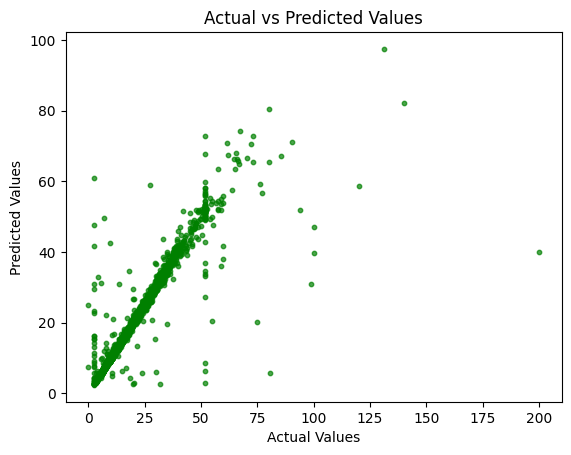

In [371]:
# Visualize the actual vs predicted fare amount
import matplotlib.pyplot as plt

plt.scatter(y_validation, y_pred,  s=10, alpha=0.7, color='green')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()

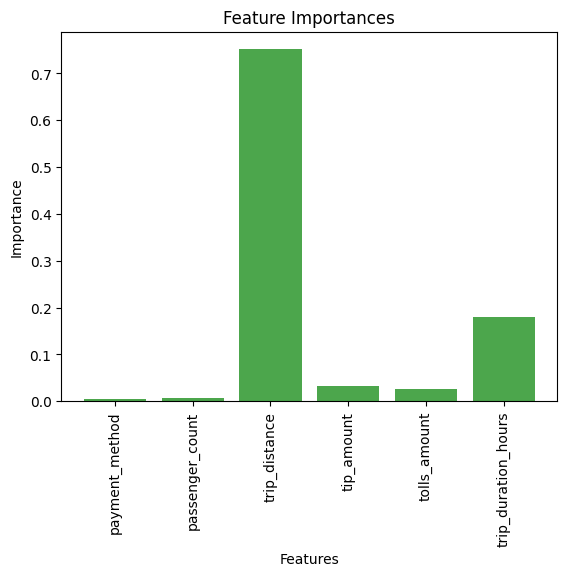

In [372]:
# Visualize feature importances
import pandas as pd
X_train_df = pd.DataFrame(X_train, columns=trip_dfm.drop('fare_amount', axis=1).columns)
feature_importances = model.feature_importances_
features = X_train_df.columns
plt.bar(features, feature_importances, alpha=0.7, color='green')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(rotation=90)
plt.title('Feature Importances')
plt.show()

# Retrospective

1. It was possible to understnad the data type and null record through the info() and isnull().sum() functions (three(3) null records in the 'fare_amount' column).
2. The missing data in the 'fare_amount' column was replace with the median value. 
3. Removed duplicated records(2) in the dataset with drop_duplicates() function.
4. The outliers in the 'passenger_count', 'fare_amount', 'tip_amount' were removed based on the visual check in scatterplot and boxplot.
5. Added  'trip_duration_hours' column by calculating the difference between 'tpep_pickup_datetime' and 'tpep_dropoff_datetime' columns after changing the date type to datetime.
6. Replaced 'payment_method' with numeric values.
7. Created a new dataframe with selected columns.
8. Visualized the correlation between features and found that 'trip_distance' and 'fare_amount' have a high correlation.
9. Trained the models with Linear Regression and Random Forest Regression to predict the 'fare_amount'. 
10. Found that Random Forest Regression performed better than Linear Regression.
11. Visualized the feature importances and found that 'trip_distance' has the highest importance in predicting 'fare_amount'.